In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing,linear_model
%matplotlib inline

In [149]:
train_data = pd.read_csv("train.csv")

In [150]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [151]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [152]:
corrmat = train_data.corr()
imp_cols = corrmat.nlargest(10,['SalePrice']).index

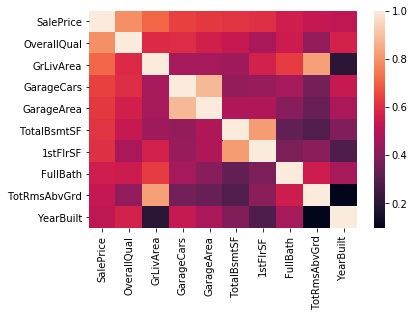

In [153]:
corrmat = train_data[imp_cols].corr()
sns.heatmap(corrmat,cbar=True,xticklabels=imp_cols.values)

In [154]:
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [155]:
train_data1 = train_data.drop((missing_data[missing_data['Total']>1]).index,1)

In [156]:
train_data1.isna().sum().sort_values(ascending=False)

Electrical       1
SalePrice        0
Heating          0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
                ..
SaleCondition    0
CentralAir       0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageArea       0
GarageCars       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath    

In [157]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [158]:
train_data.shape

(1460, 81)

In [159]:
train_data1.isnull().sum().max()

1

In [160]:
train_data = train_data1.copy()

In [161]:
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [162]:
train_data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
                ..
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [163]:
train_data= train_data.drop(train_data.loc[train_data['Electrical'].isna()].index)

In [164]:
train_data.isna().sum().max()

0

In [165]:
scaler = preprocessing.StandardScaler()

In [166]:
sp_scaled = scaler.fit_transform(train_data[['SalePrice']])

C:\Users\ferdi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ferdi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [167]:
sp_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [168]:
low_range = sp_scaled[sp_scaled[:,0].argsort()][:10]
high_range= sp_scaled[sp_scaled[:,0].argsort()][-10:]

In [169]:
print(low_range)

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]


In [170]:
print(high_range)

[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [171]:
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)

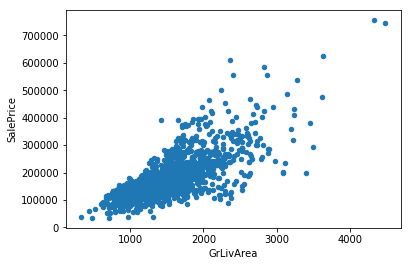

In [172]:
train_data.plot.scatter(x='GrLivArea',y='SalePrice')

In [173]:
train_data['SalePrice'] = np.log(train_data['SalePrice'])


In [174]:
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,11.870600
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,12.634603
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,12.206073
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,11.774520
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,11.678440


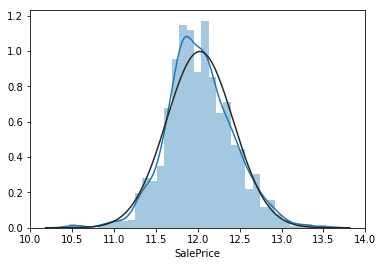

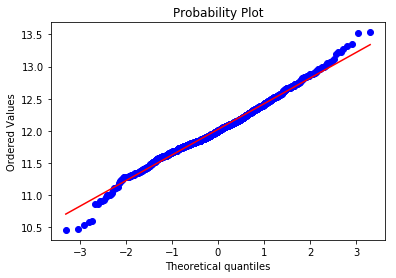

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import probplot
sns.distplot(train_data['SalePrice'], fit=norm)
fig = plt.figure()
res = probplot(train_data['SalePrice'], plot=plt)

In [186]:
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])


In [187]:
train_data = pd.get_dummies(train_data)


In [188]:
train_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [190]:

>>> from sklearn.model_selection import train_test_split

In [192]:
X = train_data.drop(columns=['SalePrice'])

In [193]:
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [194]:
Y = train_data['SalePrice']

In [195]:
Y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [228]:
rgr1 = linear_model.LinearRegression()

In [229]:
x_train.shape
y_train.shape

(1165,)

In [230]:
X.shape


(1457, 220)

In [231]:
Y.shape

(1457,)

In [210]:
rgr1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [211]:
rgr1.score(X_test,y_test)

0.9037011575159493

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.003, MSE test data: 0.020
R2 train data: 0.983, R2 test data: 0.885


In [236]:
from keras import Sequential
from keras.layers import Dense
def baseline_model():
    model = Sequential()
    model.add(Dense(220, input_dim=220, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    return model

In [237]:
model = baseline_model()

In [238]:
model.fit(X_train,y_train,epochs=1000,batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
1165/1165 [==============================] - 2s 2ms/step - loss: 115.1387
Epoch 2/1000
1165/1165 [==============================] - 0s 28us/step - loss: 50.1874
Epoch 3/1000
1165/1165 [==============================] - 0s 15us/step - loss: 33.1492
Epoch 4/1000
1165/1165 [==============================] - 0s 13us/step - loss: 23.6202
Epoch 5/1000
1165/1165 [==============================] - 0s 9us/step - loss: 15.4943
Epoch 6/1000
1165/1165 [==============================] - 0s 11us/step - loss: 11.1085
Epoch 7/1000
1165/1165 [==============================] - 0s 10us/step - loss: 9.7268
Epoch 8/1000
1165/1165 [==============================] - 0s 9us/step - loss: 9.6455
Epoch 9/1000
1165/1165 [==============================] - 0s 11us/step - loss: 16.8531
Epoch 10/1000
1165/1165 [==============================] - 0s 9us/step - loss: 17.5230
Epoch 11/1000
1165/1165 [==============================] - 0s 11us/step - loss: 12.301

1165/1165 [==============================] - 0s 10us/step - loss: 10.4085
Epoch 184/1000
1165/1165 [==============================] - 0s 11us/step - loss: 18.7952
Epoch 185/1000
1165/1165 [==============================] - 0s 10us/step - loss: 32.3702
Epoch 186/1000
1165/1165 [==============================] - 0s 11us/step - loss: 27.6069
Epoch 187/1000
1165/1165 [==============================] - 0s 9us/step - loss: 23.8391
Epoch 188/1000
1165/1165 [==============================] - 0s 10us/step - loss: 17.5739
Epoch 189/1000
1165/1165 [==============================] - 0s 10us/step - loss: 19.6359
Epoch 190/1000
1165/1165 [==============================] - 0s 10us/step - loss: 9.6636
Epoch 191/1000
1165/1165 [==============================] - 0s 10us/step - loss: 9.5977
Epoch 192/1000
1165/1165 [==============================] - 0s 10us/step - loss: 17.0618
Epoch 193/1000
1165/1165 [==============================] - 0s 9us/step - loss: 18.6839
Epoch 194/1000
1165/1165 [==============

1165/1165 [==============================] - 0s 10us/step - loss: 10.2991
Epoch 276/1000
1165/1165 [==============================] - 0s 10us/step - loss: 9.0252
Epoch 277/1000
1165/1165 [==============================] - 0s 10us/step - loss: 7.1556
Epoch 278/1000
1165/1165 [==============================] - 0s 11us/step - loss: 17.4352
Epoch 279/1000
1165/1165 [==============================] - 0s 9us/step - loss: 13.2678
Epoch 280/1000
1165/1165 [==============================] - 0s 11us/step - loss: 14.1487
Epoch 281/1000
1165/1165 [==============================] - 0s 10us/step - loss: 7.6284
Epoch 282/1000
1165/1165 [==============================] - 0s 10us/step - loss: 10.3519
Epoch 283/1000
1165/1165 [==============================] - 0s 9us/step - loss: 17.7365
Epoch 284/1000
1165/1165 [==============================] - 0s 10us/step - loss: 11.3373
Epoch 285/1000
1165/1165 [==============================] - 0s 9us/step - loss: 11.2404
Epoch 286/1000
1165/1165 [================

1165/1165 [==============================] - 0s 10us/step - loss: 16.4038
Epoch 461/1000
1165/1165 [==============================] - 0s 9us/step - loss: 20.0820
Epoch 462/1000
1165/1165 [==============================] - 0s 9us/step - loss: 11.5920
Epoch 463/1000
1165/1165 [==============================] - 0s 11us/step - loss: 7.5935
Epoch 464/1000
1165/1165 [==============================] - 0s 9us/step - loss: 11.5365
Epoch 465/1000
1165/1165 [==============================] - 0s 10us/step - loss: 13.8776
Epoch 466/1000
1165/1165 [==============================] - 0s 9us/step - loss: 14.6347
Epoch 467/1000
1165/1165 [==============================] - 0s 11us/step - loss: 14.2069
Epoch 468/1000
1165/1165 [==============================] - 0s 11us/step - loss: 13.0971
Epoch 469/1000
1165/1165 [==============================] - 0s 11us/step - loss: 15.9643
Epoch 470/1000
1165/1165 [==============================] - 0s 10us/step - loss: 10.7597
Epoch 471/1000
1165/1165 [===============

1165/1165 [==============================] - 0s 10us/step - loss: 11.5339
Epoch 645/1000
1165/1165 [==============================] - 0s 9us/step - loss: 11.5152
Epoch 646/1000
1165/1165 [==============================] - 0s 9us/step - loss: 17.4269
Epoch 647/1000
1165/1165 [==============================] - 0s 11us/step - loss: 12.3050
Epoch 648/1000
1165/1165 [==============================] - 0s 11us/step - loss: 11.0865
Epoch 649/1000
1165/1165 [==============================] - 0s 11us/step - loss: 12.6434
Epoch 650/1000
1165/1165 [==============================] - 0s 10us/step - loss: 6.4334
Epoch 651/1000
1165/1165 [==============================] - 0s 11us/step - loss: 10.0986
Epoch 652/1000
1165/1165 [==============================] - 0s 10us/step - loss: 10.9184
Epoch 653/1000
1165/1165 [==============================] - 0s 10us/step - loss: 15.3152
Epoch 654/1000
1165/1165 [==============================] - 0s 9us/step - loss: 19.1599
Epoch 655/1000
1165/1165 [==============

1165/1165 [==============================] - 0s 9us/step - loss: 8.4186
Epoch 830/1000
1165/1165 [==============================] - 0s 11us/step - loss: 3.2916
Epoch 831/1000
1165/1165 [==============================] - 0s 10us/step - loss: 8.5877
Epoch 832/1000
1165/1165 [==============================] - 0s 12us/step - loss: 9.9650
Epoch 833/1000
1165/1165 [==============================] - 0s 11us/step - loss: 10.3470
Epoch 834/1000
1165/1165 [==============================] - 0s 10us/step - loss: 7.1007
Epoch 835/1000
1165/1165 [==============================] - 0s 9us/step - loss: 5.6020
Epoch 836/1000
1165/1165 [==============================] - 0s 11us/step - loss: 14.4238
Epoch 837/1000
1165/1165 [==============================] - 0s 10us/step - loss: 14.6196
Epoch 838/1000
1165/1165 [==============================] - ETA: 0s - loss: 12.62 - 0s 10us/step - loss: 11.6786
Epoch 839/1000
1165/1165 [==============================] - 0s 9us/step - loss: 17.0520
Epoch 840/1000
1165/1

In [239]:
model.evaluate(X_test,y_test)

292/292 [==============================] - 0s 85us/step


2.787951603327712

In [241]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)


292/292 [==============================] - 0s 10us/step


In [242]:
print(loss_and_metrics)

2.7879516849779105
